In [1]:
# initialisation
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy, IBMQBackend
from qiskit.tools.jupyter import *
# from ibm_quantum_widgets import *
# from qiskit.providers.aer import QasmSimulator
from qiskit_textbook.problems import dj_problem_oracle

# basic plot tools
from qiskit.visualization import plot_histogram

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


# Deutsch-Jozsa Algorithm

nearly as shown in the video

In [9]:
def dj_oracle(n, oraclenr):
    oracle = dj_problem_oracle(oraclenr)
    oracle.name = "DJ-Oracle"
    return oracle

In [10]:
def dj_algorithm(n, oraclenr=0):
    dj_circuit = QuantumCircuit(n+1, n)
    # set up the input register
    for qubit in range(n):
        dj_circuit.h(qubit)
    # and set the qubit output
    dj_circuit.x(n)
    dj_circuit.h(n)
    # append oracle gate to our circuit
    if oraclenr == 0:
        oraclenr = np.random.randint(1,3)
    oracle = dj_oracle(n, oraclenr)
    dj_circuit.append(oracle, range(n+1))
    # finally, perform h gates again and measure
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit

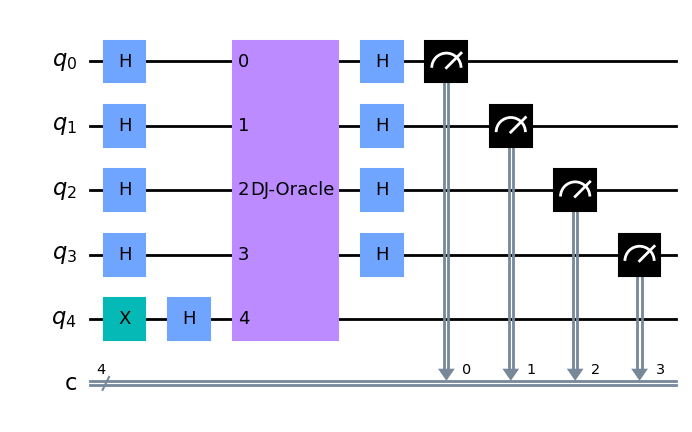

In [11]:
n = 4  # nr qubits
oraclenr = np.random.randint(1, n+1)  # determines the oracle (1 to n incl.)
oraclenr = 0
dj_circuit = dj_algorithm(n, oraclenr)
dj_circuit.draw("mpl")


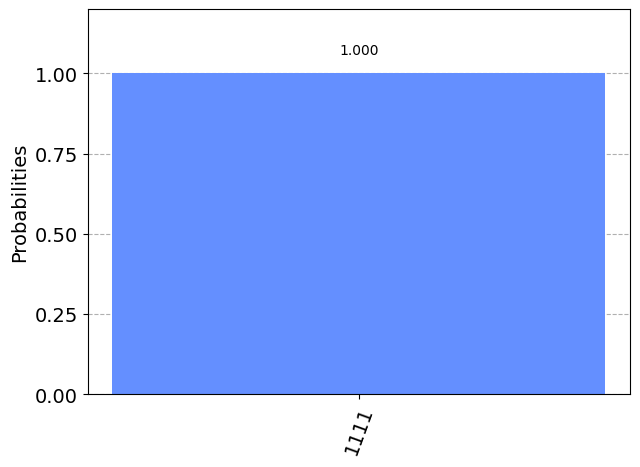

In [12]:
# use local simulator
backend = Aer.get_backend('aer_simulator')
shots = 1000  # up to 65536
dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

## Simulator backend

In [6]:
# using a real qc backend: lest busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) \
                                      and not x.configuration().simulator \
                                      and x.status().operational == True)) 
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


## Use real backend

run _one_ of the next two cells

In [ ]:
# using a real backend by name
backend = provider.get_backend(name='ibm_oslo')
print("selected backend: ", backend)

In [7]:
shots = 20000
%qiskit_job_watcher
dj_circuit = dj_algorithm(n, oraclenr)
job = execute(dj_circuit, backend=backend, shots=shots, optimization_level=3)
# layout = [0, 4, 2, 3, 1]   # hanoi
# job = execute(dj_circuit, backend=backend, shots=shots, initial_layout=layout, optimization_level=3)
print('backend: ', backend)
print(job.job_id())

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

backend:  ibmq_belem
6335ff91ae9f3c5a0f422160


In [18]:
# jobs I ran before
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
backend = provider.get_backend('ibm_oslo')
old_job = backend.retrieve_job('6335f5e3e5d6cf44d1008006')

results = old_job.result()
counts = results.get_counts()
plot_histogram(counts)

IBMQBackendApiError: "Failed to get job 6335f5e3e5d6cf44d1008006: '403 Client Error: Forbidden for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/6335f5e3e5d6cf44d1008006/v/1. Forbidden., Error code: 2409.'"

In [ ]:
# get the results of the computation
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

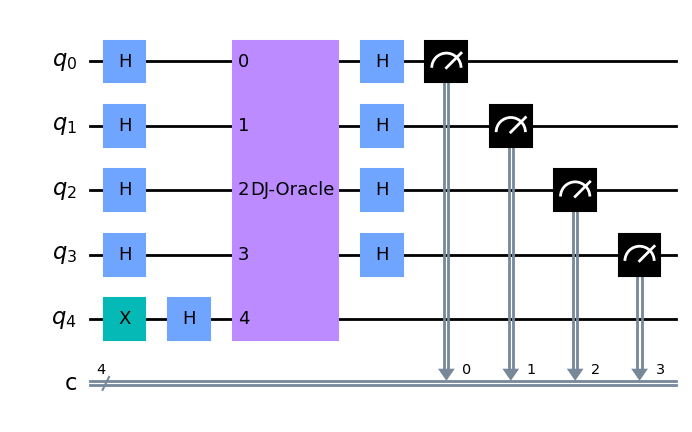

In [13]:
def dj_oracle(n, oraclenr):
    # we need to make a QuantumCircuit object to return
    # this circuit has n+1 qubits: the side of the input, plus 1 output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First: case in which oracle is balanced
    if oraclenr == 1:
        # we apply controlled-not gates for each qubit, using the output 
        # qubit as the target
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
    
    # constant case
    if oraclenr == 2:
        # first decide what the fixed output of the oracle will be, 
        # always 0 or always 1
        output = np.random.randint(2)
        if output == 1:
            oracle:qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "DJ-Oracle"
    return oracle_gate

n = 4  # qubits
dj_circuit = dj_algorithm(n)
dj_circuit.draw('mpl')

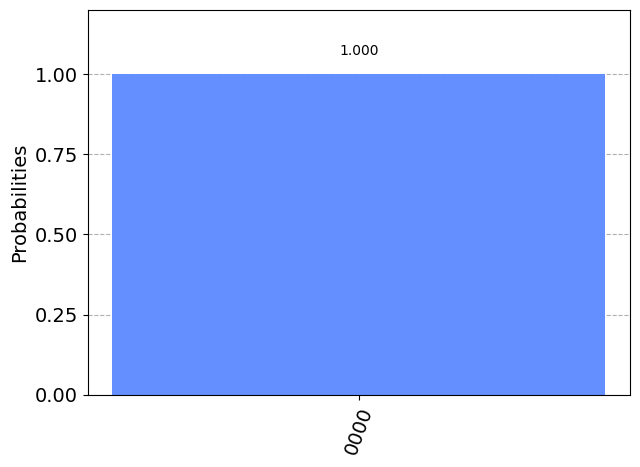

In [14]:
# use local simulator
results = execute(dj_circuit, backend=backend, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

## Oracle for != 4 qubits
